About Dataset

Context:

The Ramen Rater is a product review website for the hardcore ramen enthusiast (or "ramenphile"), with over 2500 reviews to date. This dataset is an export of "The Big List" (of reviews), converted to a CSV format.

Content:

Each record in the dataset is a single ramen product review. Review numbers are contiguous: more recently reviewed ramen varieties have higher numbers. Brand, Variety (the product name), Country, and Style (Cup? Bowl? Tray?) are pretty self-explanatory. Stars indicate the ramen quality, as assessed by the reviewer, on a 5-point scale; this is the most important column in the dataset!

Note :

that this dataset does not include the text of the reviews themselves. For that, you should browse through https://www.theramenrater.com/ instead!

Outline:

Import Datasets

Data Cleaning and Data Preparation

Exploratory Data Analysis

Feature Engineering

Train Test Split

Model Building

Model Evaluation


In [1]:
# Import Libraries for Analysis
import numpy as np
import pandas as pd

# Import Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for train test split
from sklearn.model_selection import train_test_split

# import Ilbrary for Scaling
from sklearn.preprocessing import StandardScaler

# import Ilbrary for Model Building
from sklearn.linear_model import LinearRegression

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the CSV file into a DataFrame named 'ramen_org'
ramen_org=pd.read_csv("C:\\Users\\91891\\Documents\\ramen-ratings.csv")
# Displaying the first few rows of the DataFrame
ramen_org.head()

,review,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [3]:
ramen_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   review   2580 non-null   int64 
 1   Brand    2580 non-null   object
 2   Variety  2580 non-null   object
 3   Style    2578 non-null   object
 4   Country  2580 non-null   object
 5   Stars    2580 non-null   object
 6   Top Ten  41 non-null     object
dtypes: int64(1), object(6)
memory usage: 141.2+ KB


In [4]:
ramen_org.describe()

,review
count,2580.000000
mean,1290.500000
std,744.926171
min,1.000000
25%,645.750000
50%,1290.500000
75%,1935.250000
max,2580.000000


In [5]:
ramen_org.isnull().sum()

review        0
Brand         0
Variety       0
Style         2
Country       0
Stars         0
Top Ten    2539
dtype: int64

In [6]:
ramen_org.columns

Index(['review', 'Brand', 'Variety', 'Style', 'Country', 'Stars', 'Top Ten'], dtype='object')

In [7]:
# Removing leading and trailing spaces from the column names
ramen_org.columns=ramen_org.columns.str.strip()
print("After Removing leading and trailing spaces",ramen_org.columns)

After Removing leading and trailing spaces Index(['review', 'Brand', 'Variety', 'Style', 'Country', 'Stars', 'Top Ten'], dtype='object')


In [8]:
ramen_org=ramen_org.dropna(subset=['Style'])
ramen_org.isnull().sum()

review        0
Brand         0
Variety       0
Style         0
Country       0
Stars         0
Top Ten    2537
dtype: int64

In [9]:
ramen_org=ramen_org.drop('Top Ten',axis=1)
ramen_org.isnull().sum()

review     0
Brand      0
Variety    0
Style      0
Country    0
Stars      0
dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder
# assume df is our dataset
le = LabelEncoder()
ramen_org['Brand_code'] = le.fit_transform(ramen_org['Brand'])

In [11]:
ramen_org.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2578 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   review      2578 non-null   int64 
 1   Brand       2578 non-null   object
 2   Variety     2578 non-null   object
 3   Style       2578 non-null   object
 4   Country     2578 non-null   object
 5   Stars       2578 non-null   object
 6   Brand_code  2578 non-null   int32 
dtypes: int32(1), int64(1), object(5)
memory usage: 151.1+ KB


In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

ramen_org['Brand'] = le.fit_transform(ramen_org['Brand'])
ramen_org['Variety'] = le.fit_transform(ramen_org['Variety'])
ramen_org['Style'] = le.fit_transform(ramen_org['Style'])
ramen_org['Country'] = le.fit_transform(ramen_org['Country'])
ramen_org['Stars'] = le.fit_transform(ramen_org['Stars'])

In [13]:
ramen_org.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2578 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   review      2578 non-null   int64
 1   Brand       2578 non-null   int32
 2   Variety     2578 non-null   int32
 3   Style       2578 non-null   int32
 4   Country     2578 non-null   int32
 5   Stars       2578 non-null   int32
 6   Brand_code  2578 non-null   int32
dtypes: int32(6), int64(1)
memory usage: 100.7 KB


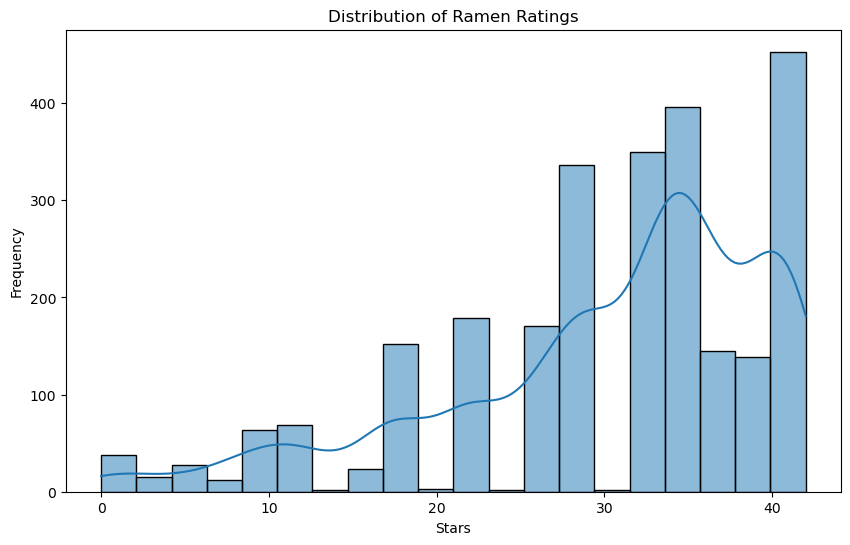

In [15]:
# Histogram of stars
plt.figure(figsize=(10, 6))
sns.histplot(ramen_org['Stars'], bins=20, kde=True)
plt.title('Distribution of Ramen Ratings')
plt.xlabel('Stars')
plt.ylabel('Frequency')
plt.show()

Box Plots for Categorical Variables

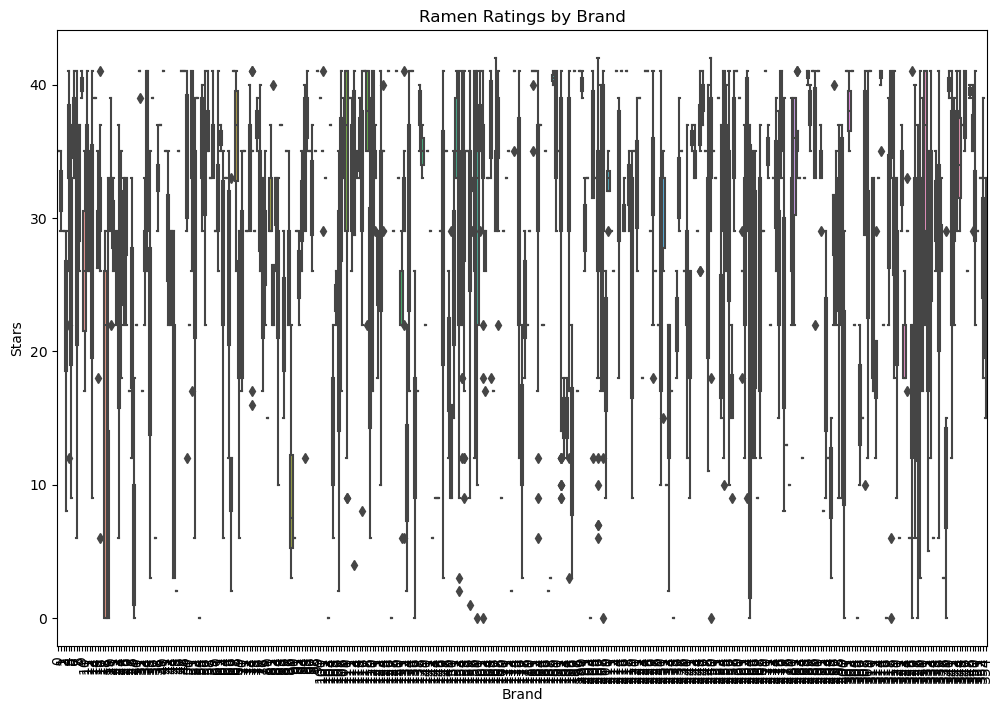

In [23]:
# Box plot of ratings by brand
plt.figure(figsize=(12, 8))
sns.boxplot(x='Brand', y='Stars', data=ramen_org)
plt.title('Ramen Ratings by Brand')
plt.xticks(rotation=90)
plt.show()


Scatter Plot for Numerical Variables

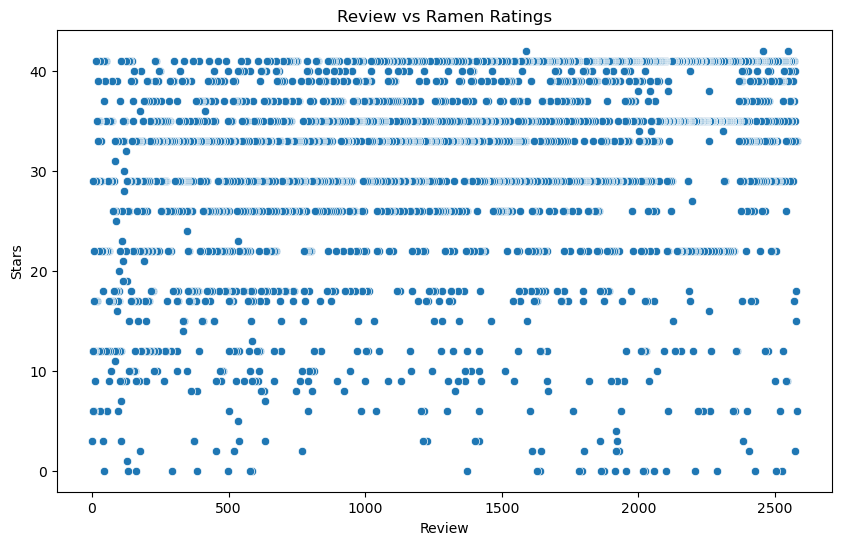

In [25]:
# Scatter plot of review vs stars
plt.figure(figsize=(10, 6))
sns.scatterplot(x='review', y='Stars', data=ramen_org)
plt.title('Review vs Ramen Ratings')
plt.xlabel('Review')
plt.ylabel('Stars')
plt.show()


Correlation Matrix

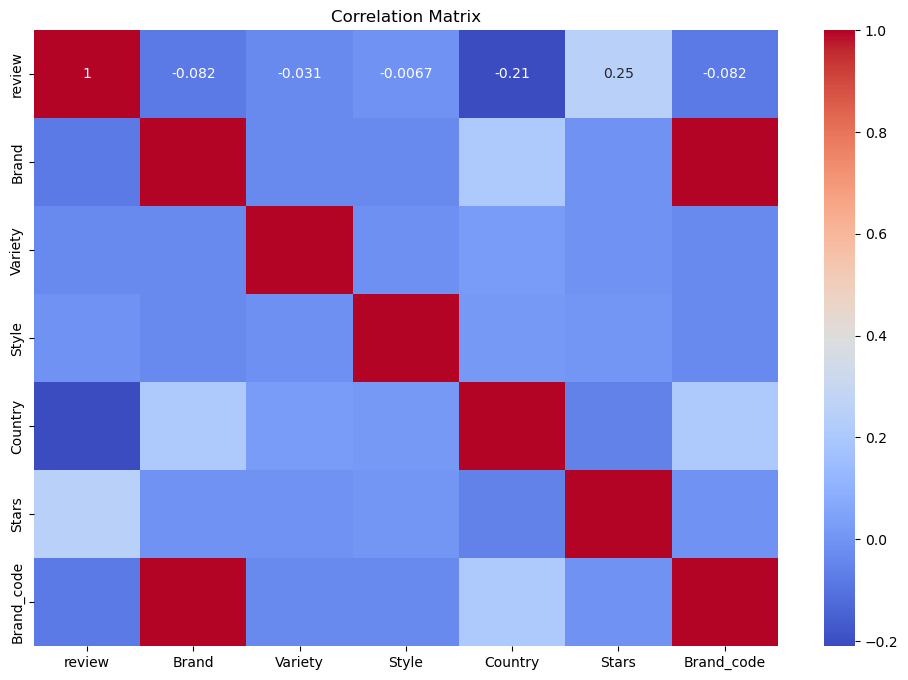

In [27]:
# Correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = ramen_org.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


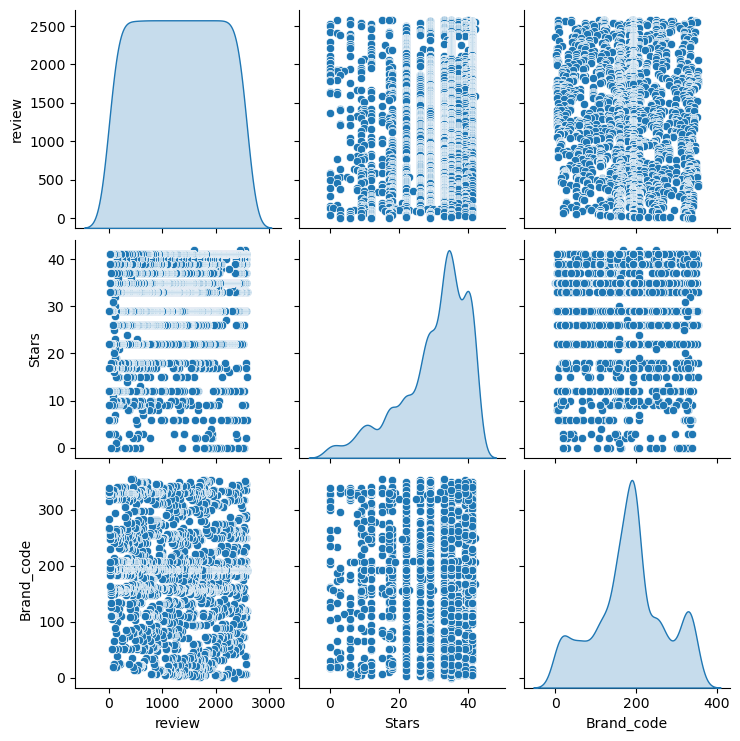

In [32]:
# Select relevant columns for the pair plot
selected_columns = ['review', 'Stars', 'Brand_code']

# Create a pair plot
sns.pairplot(ramen_org[selected_columns], diag_kind='kde')
plt.show()


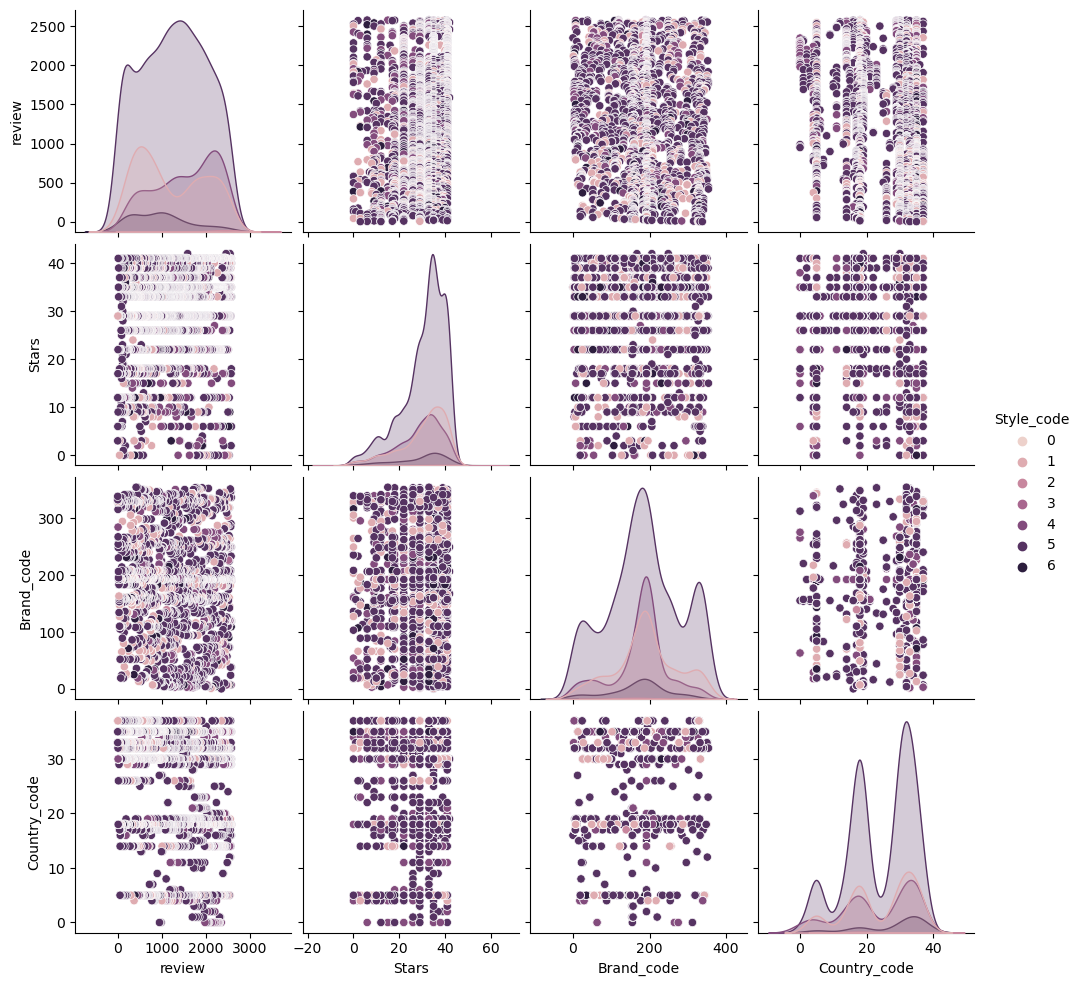

In [33]:
# Convert categorical columns to numerical codes
ramen_org['Style_code'] = ramen_org['Style'].astype('category').cat.codes
ramen_org['Country_code'] = ramen_org['Country'].astype('category').cat.codes

# Select relevant columns for the pair plot
selected_columns = ['review', 'Stars', 'Brand_code', 'Style_code', 'Country_code']

# Create a pair plot
sns.pairplot(ramen_org[selected_columns], diag_kind='kde', hue='Style_code')
plt.show()


Count Plot of Styles

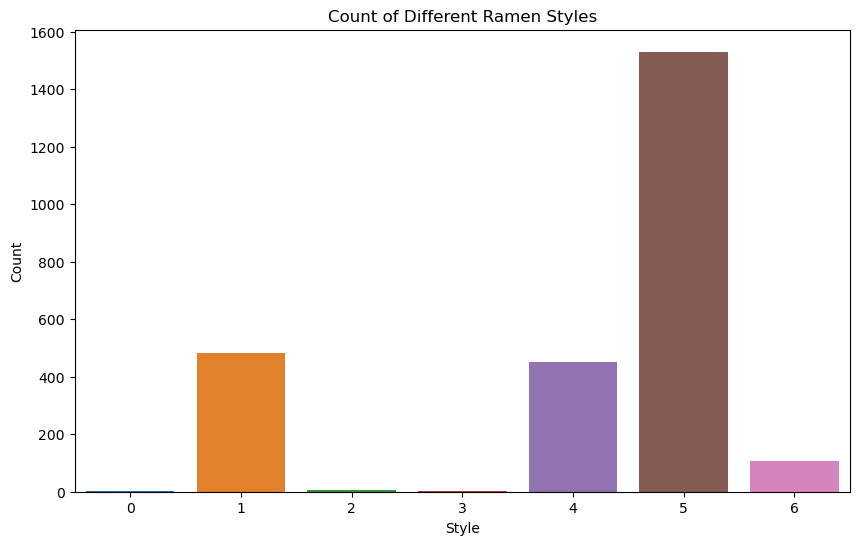

In [34]:
# Count plot of ramen styles
plt.figure(figsize=(10, 6))
sns.countplot(x='Style', data=ramen_org)
plt.title('Count of Different Ramen Styles')
plt.xlabel('Style')
plt.ylabel('Count')
plt.show()


Box Plot of Ratings by Country


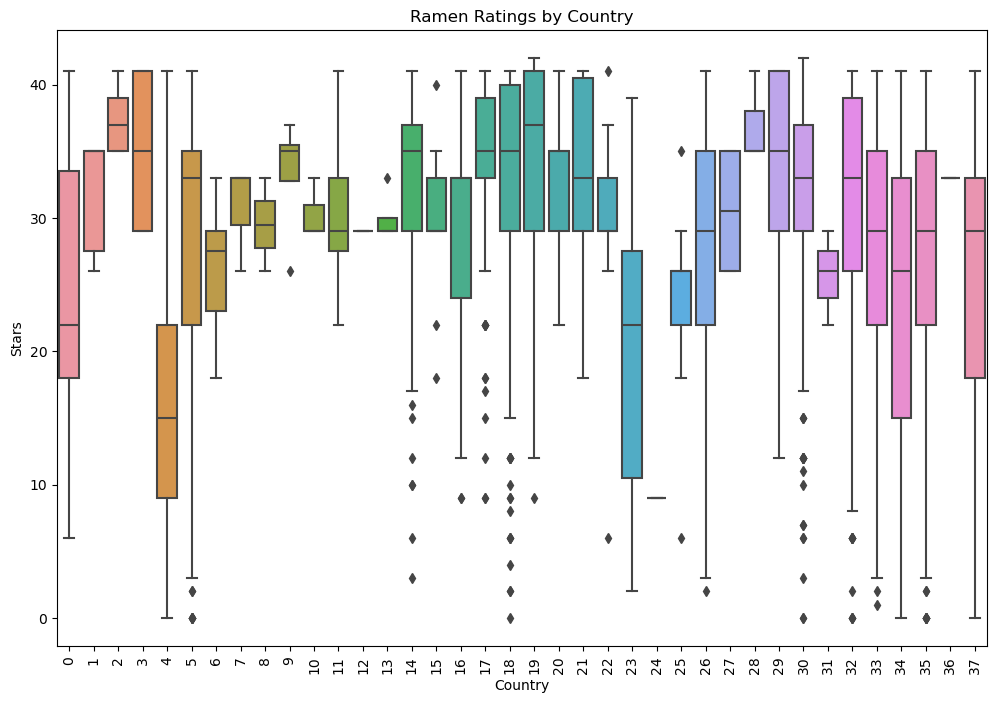

In [35]:
# Box plot of ratings by country
plt.figure(figsize=(12, 8))
sns.boxplot(x='Country', y='Stars', data=ramen_org)
plt.title('Ramen Ratings by Country')
plt.xticks(rotation=90)
plt.show()


In [38]:
# Split the data into features (X) and target (y)
X = ramen_org.drop('Stars', axis=1)
y = ramen_org['Stars']


In [39]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [42]:
from sklearn.metrics import mean_squared_error, r2_score
# Predict ratings for the testing set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 78.51729912030483
R-squared: 0.10329266932912307


In [45]:
# Calculate residuals
residuals = y_test - y_pred

# Add residuals to the test dataframe for analysis
test_data = X_test.copy()
test_data['Actual'] = y_test
test_data['Predicted'] = y_pred
test_data['Residuals'] = residuals


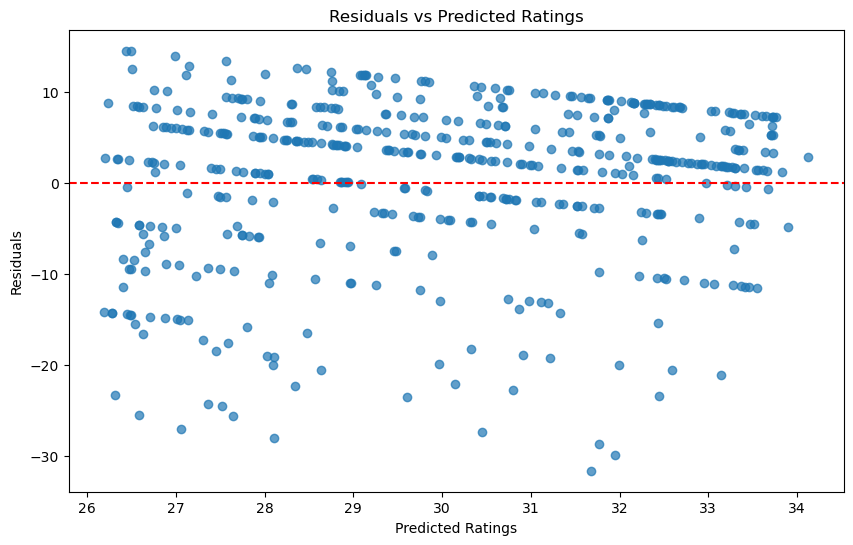

In [46]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Ratings')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Ratings')
plt.show()


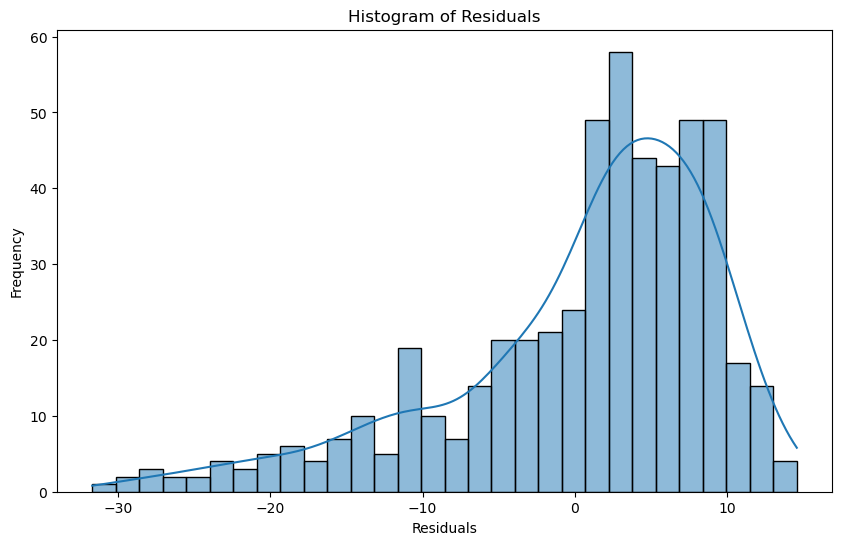

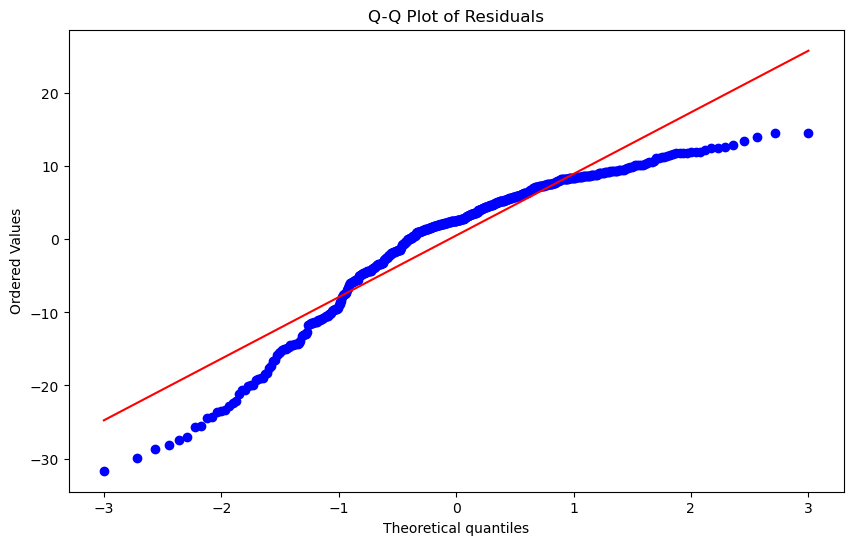

In [47]:
import scipy.stats as stats

# Histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Q-Q plot
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()


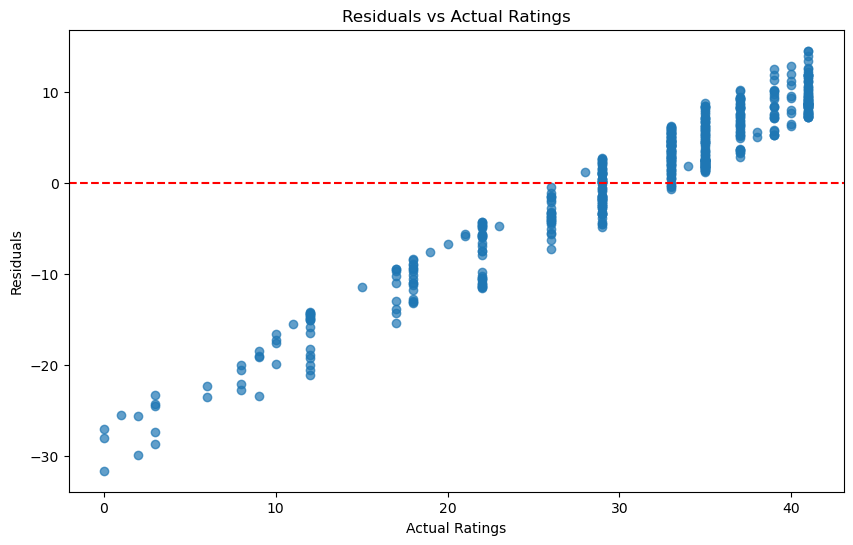

In [48]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Ratings')
plt.ylabel('Residuals')
plt.title('Residuals vs Actual Ratings')
plt.show()


Explanation
Residual Plot: The plot of residuals against predicted values should show no obvious pattern (randomly scattered around zero). If you see a pattern, it indicates that the model is not capturing some aspect of the data properly.
Histogram of Residuals: The histogram should resemble a normal distribution if the residuals are normally distributed.
Q-Q Plot: Points should lie on the line if the residuals are normally distributed.
Homoscedasticity: Residuals should have constant variance (no funnel shape).
Interpreting the Results
Residual Plot: If the residuals are randomly scattered around zero, it suggests that the model has a good fit. Patterns in the residual plot indicate model inadequacies.
Histogram and Q-Q Plot: If the histogram is approximately bell-shaped and the Q-Q plot shows points lying on the line, the residuals are normally distributed.
Homoscedasticity Check: If the residuals have constant variance (no pattern in the residuals vs actual values plot), it suggests homoscedasticity. A funnel shape indicates heteroscedasticity.

Conclusion
Performing residual analysis helps you validate the assumptions of your regression model and diagnose any potential issues. If you find patterns in the residuals, non-normality, or heteroscedasticity, consider improving the model through feature engineering, transformations, or trying different models.